In [1]:
#standard imports
import numpy as np
import pandas as pd
from numpy.random import randn
#stats
from scipy import stats
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#rug plot
dataset = randn(25)

(array([ 2.,  3.,  3.,  4.,  4.,  3.,  3.,  2.,  0.,  1.]),
 array([-1.92276755, -1.3757845 , -0.82880146, -0.28181841,  0.26516463,
         0.81214767,  1.35913072,  1.90611376,  2.45309681,  3.00007985,
         3.54706289]),
 <a list of 10 Patch objects>)

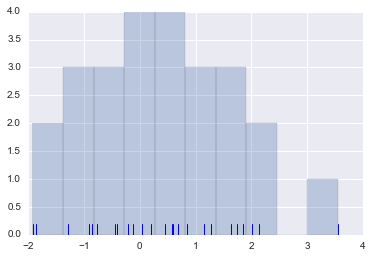

In [9]:
sns.rugplot(dataset)
plt.hist(dataset, alpha =.3)

(0, 1)

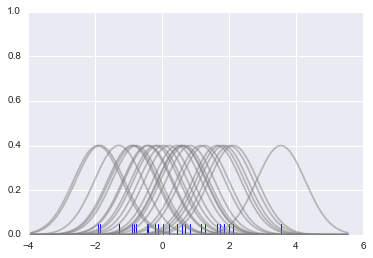

In [20]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4*dataset.std()**5)/(3*len(dataset)))**.2
kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = .5)

plt.ylim(0,1)

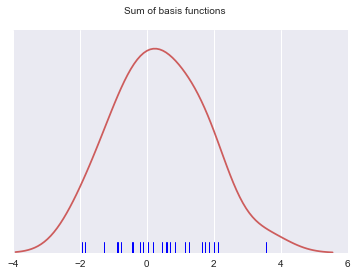

In [21]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of basis functions')

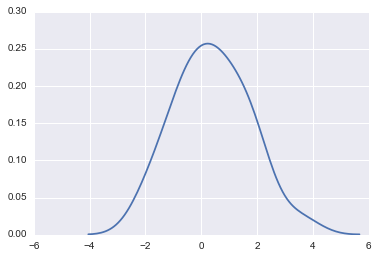

In [22]:
sns.kdeplot(dataset)

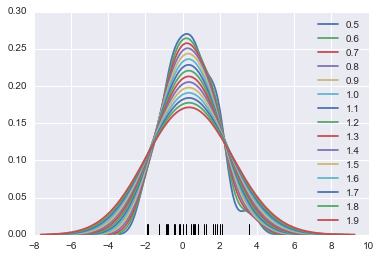

In [26]:
sns.rugplot(dataset, color ='black')

for bw in np.arange(.5, 2, .1):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label = bw)

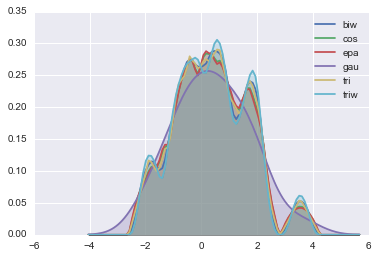

In [30]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade = True)

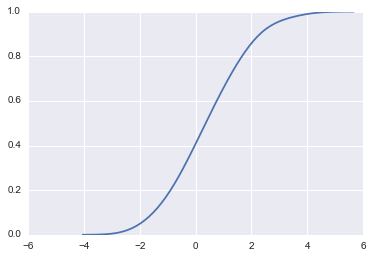

In [31]:
sns.kdeplot(dataset, cumulative = True)

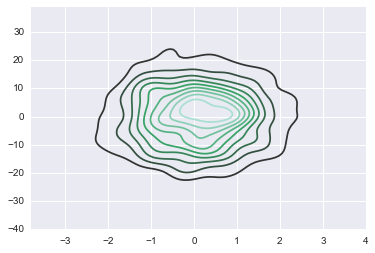

In [32]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns = ['x','y'])

sns.kdeplot(dframe)

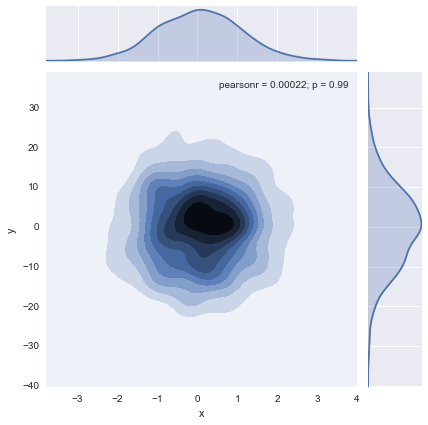

In [33]:
sns.jointplot('x','y', dframe, kind='kde')